In [20]:
import pandas as pd
from pandas import *
import folium
import plotly.graph_objects as go

import pycountry # To convert country names to 3 letter code

import webbrowser

import pickle

In [21]:
# Getting data
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
new_base_url = 'https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series'

def loadData(fileName, columnName):
    data = pd.read_csv(base_url + fileName) \
             .melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name=columnName) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data

In [22]:
all_data = loadData("time_series_covid19_confirmed_global.csv", "CumConfirmed") \
    .merge(loadData("time_series_covid19_deaths_global.csv", "CumDeaths"))

In [23]:
all_data.head()

,Province/State,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths
0,<all>,Afghanistan,33.0000,65.0000,2020-01-22,0,0
1,<all>,Albania,41.1533,20.1683,2020-01-22,0,0
2,<all>,Algeria,28.0339,1.6596,2020-01-22,0,0
3,<all>,Andorra,42.5063,1.5218,2020-01-22,0,0
4,<all>,Angola,-11.2027,17.8739,2020-01-22,0,0


In [24]:
grouped_countries = all_data.groupby('Country/Region').agg({'CumConfirmed': 'max', 'CumDeaths': 'max'}).reset_index()
grouped_countries.head()

,Country/Region,CumConfirmed,CumDeaths
0,Afghanistan,349,7
1,Albania,361,20
2,Algeria,1320,152
3,Andorra,501,18
4,Angola,14,2


In [25]:
grouped_countries[grouped_countries['Country/Region'] == 'Canada']

,Country/Region,CumConfirmed,CumDeaths
32,Canada,7944,119


In [26]:
grouped_countries['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [27]:
burma = pycountry.countries.get(alpha_3='MMR')

# Country(alpha_2='DE', alpha_3='DEU', name='Germany', numeric='276', official_name='Federal Republic of Germany')
# germany.alpha_2

burma.name

# germany.numeric

# german


'Myanmar'

In [28]:
input_countries = grouped_countries['Country/Region']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

print(codes)
grouped_countries['code'] = codes

['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BTN', 'Unknown code', 'BIH', 'BWA', 'BRA', 'Unknown code', 'BGR', 'BFA', 'Unknown code', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'Unknown code', 'Unknown code', 'CRI', 'Unknown code', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'Unknown code', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'Unknown code', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'Unknown code', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'Unknown code', 'Unknown code', 'KWT', 'KGZ', 'Unknown code', 'LVA', 'LBN', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'Unknown code', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX', 'Unknown code', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA'

In [29]:
# Pickling list of country code
with open('pickled_files/country_codes.pkl', 'wb') as f:
    pickle.dump(codes, f)

In [30]:
grouped_countries.head(50)

,Country/Region,CumConfirmed,CumDeaths,code
0,Afghanistan,349,7,AFG
1,Albania,361,20,ALB
2,Algeria,1320,152,DZA
3,Andorra,501,18,AND
4,Angola,14,2,AGO
5,Antigua and Barbuda,15,0,ATG
6,Argentina,1451,44,ARG
7,Armenia,822,7,ARM
8,Australia,2580,16,AUS
9,Austria,12051,204,AUT


In [31]:
grouped_countries[grouped_countries.code == 'Unknown code']

,Country/Region,CumConfirmed,CumDeaths,code
20,Bolivia,157,10,Unknown code
24,Brunei,135,1,Unknown code
27,Burma,21,1,Unknown code
38,Congo (Brazzaville),45,5,Unknown code
39,Congo (Kinshasa),154,18,Unknown code
41,Cote d'Ivoire,261,3,Unknown code
47,Diamond Princess,712,11,Unknown code
74,Holy See,7,0,Unknown code
80,Iran,58226,3603,Unknown code
90,"Korea, South",10237,183,Unknown code


In [32]:
unknown_codes = list(zip(grouped_countries[grouped_countries.code == 'Unknown code'].index, grouped_countries['Country/Region']))
unknown_codes

[(20, 'Afghanistan'),
 (24, 'Albania'),
 (27, 'Algeria'),
 (38, 'Andorra'),
 (39, 'Angola'),
 (41, 'Antigua and Barbuda'),
 (47, 'Argentina'),
 (74, 'Armenia'),
 (80, 'Australia'),
 (90, 'Austria'),
 (91, 'Azerbaijan'),
 (94, 'Bahamas'),
 (102, 'Bahrain'),
 (112, 'Bangladesh'),
 (138, 'Barbados'),
 (161, 'Belarus'),
 (162, 'Belgium'),
 (163, 'Belize'),
 (170, 'Benin'),
 (177, 'Bhutan'),
 (178, 'Bolivia'),
 (179, 'Bosnia and Herzegovina')]

In [33]:
# codes_to_add = ['BOL', 'BWN', 'MMR', 'COG', 'COD', 'CIV', 'VAT', 'IRN', 'KOR', 'RKS', 'LAO', 'MDA', 'RUS', 'TWN', 'TZA', 'USA', 'VEN', 'VNM', 'PSE']                                 

# for index, country in unknown_codes:
    
#     print(index)
#     grouped_countries.loc[index, 'code'] = [codes_to_add[i] for i in range(len(codes_to_add))]
    

In [34]:
#[print(i) for i in range(len(codes_to_add))]

In [35]:
# Manually adding 3-letter codes
grouped_countries.loc[20, 'code'] = 'BOL'
grouped_countries.loc[24, 'code'] = 'BWN'
grouped_countries.loc[27, 'code'] = 'MMR'
grouped_countries.loc[38, 'code'] = 'COG'
grouped_countries.loc[39, 'code'] = 'COD'
grouped_countries.loc[41, 'code'] = 'CIV'
grouped_countries.loc[74, 'code'] = 'VAT'
grouped_countries.loc[80, 'code'] = 'IRN'
grouped_countries.loc[90, 'code'] = 'KOR'
grouped_countries.loc[91, 'code'] = 'RKS'
grouped_countries.loc[94, 'code'] = 'LAO'
grouped_countries.loc[112, 'code'] = 'MDA'
grouped_countries.loc[138, 'code'] = 'RUS'
grouped_countries.loc[160, 'code'] = 'SYR'
grouped_countries.loc[162, 'code'] = 'TWN'
grouped_countries.loc[163, 'code'] = 'TZA'
grouped_countries.loc[170, 'code'] = 'USA'
grouped_countries.loc[177, 'code'] = 'VEN'
grouped_countries.loc[178, 'code'] = 'VNM'
grouped_countries.loc[179, 'code'] = 'PSE'

In [36]:
grouped_countries.iloc[172]

Country/Region    Ukraine
CumConfirmed         1308
CumDeaths              37
code                  UKR
Name: 172, dtype: object

In [37]:
grouped_countries[grouped_countries.code == 'Unknown code']

,Country/Region,CumConfirmed,CumDeaths,code
47,Diamond Princess,712,11,Unknown code
102,MS Zaandam,9,2,Unknown code
163,Tanzania,22,1,Unknown code
170,US,337072,9619,Unknown code
179,West Bank and Gaza,237,1,Unknown code


In [38]:
#colordict = {0: 'lightblue', 1: 'lightgreen', 2: 'orange', 3: 'red'}

In [39]:
all_data['Lat']

0        33.000000
1        41.153300
2        28.033900
3        42.506300
4       -11.202700
           ...    
19645   -13.254308
19646   -51.796300
19647    46.885200
19648     6.877000
19649    24.215500
Name: Lat, Length: 19650, dtype: float64

In [40]:
all_data['Long']

0        65.000000
1        20.168300
2         1.659600
3         1.521800
4        17.873900
           ...    
19645    34.301525
19646   -59.523600
19647   -56.315900
19648    31.307000
19649   -12.885800
Name: Long, Length: 19650, dtype: float64

In [41]:
all_data['location'] = list(zip(all_data['Lat'], all_data['Long']))

In [42]:
all_data.head()

,Province/State,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths,location
0,<all>,Afghanistan,33.0000,65.0000,2020-01-22,0,0,"(33.0, 65.0)"
1,<all>,Albania,41.1533,20.1683,2020-01-22,0,0,"(41.1533, 20.1683)"
2,<all>,Algeria,28.0339,1.6596,2020-01-22,0,0,"(28.0339, 1.6596)"
3,<all>,Andorra,42.5063,1.5218,2020-01-22,0,0,"(42.5063, 1.5218)"
4,<all>,Angola,-11.2027,17.8739,2020-01-22,0,0,"(-11.2027, 17.8739)"


In [43]:
confirmed = all_data.CumConfirmed
confirmed

0        0
1        0
2        0
3        0
4        0
        ..
19645    4
19646    2
19647    1
19648    1
19649    4
Name: CumConfirmed, Length: 19650, dtype: int64

In [44]:
latitude = 37.0902
longitude = -95.7129
corona_map = folium.Map(location=[latitude, longitude], zoom_start=3)

def map_locations():
    locations = all_data['location']
    confirmed_cases = all_data.CumConfirmed
    deaths = all_data.CumDeaths
    countries = all_data['Country/Region']

    for location, confirmed, death, country in zip(locations, confirmed_cases, deaths, countries):
        folium.CircleMarker(location, threshold_scale=[0,1000,20000,50000], color='#3186cc', weight=0.3,        
            fill_color='#C23208',
            fill=True,
            fill_opacity=0.7, tooltip = ('<H6>' + country + '</H6>' + '<br>' 
                                               'Confirmed: ' + '<strong style="color:#C23208;">' + str(confirmed) +'</strong>' + '<br>'
                                               'Deaths: ' + '<strong style="color:#C23208;">' + str(death) + '</strong>' + '<br>'
                    )).add_to(corona_map)
    return corona_map

In [45]:
location_map = map_locations()
location_map.save(outfile='location_map.html')

In [46]:
# country_geo = 'world_countries.json'
# m = folium.Map(location=[48, -102], zoom_start=3)

# folium.Choropleth(
#     geo_data=country_geo,
#     data=all_data.CumConfirmed
# ).add_to(m)

# folium.LayerControl().add_to(m)

#m

In [47]:
# map2 = folium.Map(location=[38.9, -77.05], tiles='CartoDB dark_matter', zoom_start=11)

# marker_cluster = folium.MarkerCluster().add_to(map2)

# for point in range(0, len(locationlist)):
#     folium.Marker(locationlist[point], popup=df_counters['Name'][point]).add_to(marker_cluster)
# map2

In [48]:
# for lat, lon, traffic_q, traffic, bike, city in zip(df['latitude'], df['longitude'], df['traffic_index_quartile'], df['traffic_index'], df['bike_score'], df['city']):
#     folium.CircleMarker(
#         [lat, lon],
#         radius=.15*bike,
#         popup = ('City: ' + str(city).capitalize() + '<br>'
#                  'Bike score: ' + str(bike) + '<br>'
#                  'Traffic level: ' + str(traffic) +'%'
#                 ),
#         color='b',
#         key_on = traffic_q,
#         threshold_scale=[0,1,2,3],
#         fill_color=colordict[traffic_q],
#         fill=True,
#         fill_opacity=0.7
#         ).add_to(traffic_map)
# traffic_map

In [49]:
grouped_countries.head()

,Country/Region,CumConfirmed,CumDeaths,code
0,Afghanistan,349,7,AFG
1,Albania,361,20,ALB
2,Algeria,1320,152,DZA
3,Andorra,501,18,AND
4,Angola,14,2,AGO


In [50]:
grouped_countries[grouped_countries['code'] == 'USA']

,Country/Region,CumConfirmed,CumDeaths,code
169,Turkey,27069,574,USA


In [51]:
import plotly.graph_objects as go
import pandas as pd

#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# def world_map():
#     fig = go.Figure(data=go.Choropleth(
#         locations = all_data['location'],
#         z = all_data['CumConfirmed'],
#         text = all_data['Country/Region'],
#         colorscale = 'Blues',
#         autocolorscale=False,
#         reversescale=True,
#         marker_line_color='darkgray',
#         marker_line_width=0.5,
#         colorbar_tickprefix = '$',
#         colorbar_title = 'GDP<br>Billions US$',
#     ))

#     fig.update_layout(
#         title_text='2014 Global GDP',
#         geo=dict(
#             showframe=False,
#             showcoastlines=False,
#             projection_type='equirectangular'
#         ),
#         annotations = [dict(
#             x=0.55,
#             y=0.1,
#             xref='paper',
#             yref='paper',
#             text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
#                 CIA World Factbook</a>',
#             showarrow = False
#         )]
#     )

#     return fig

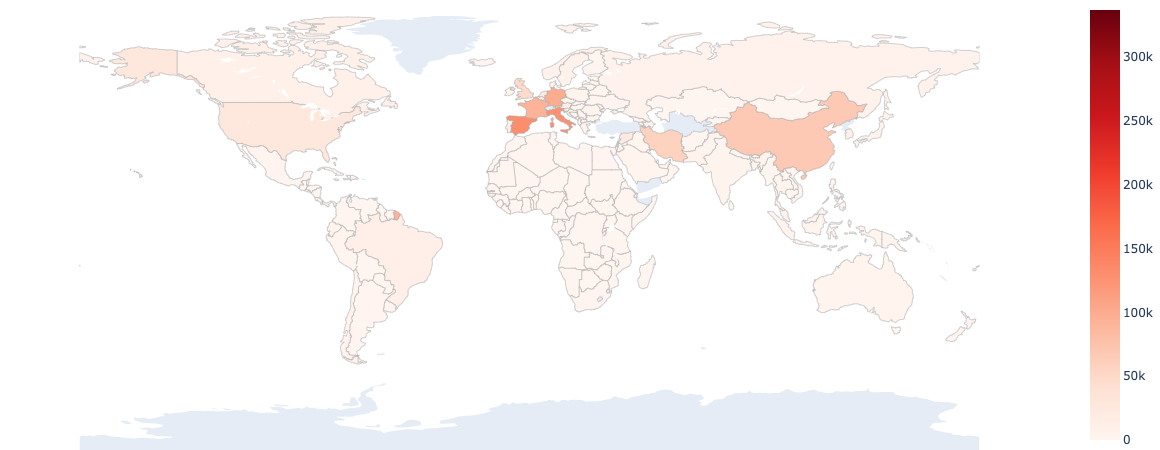

In [52]:
fig = go.Figure(data=go.Choropleth(
        locations = grouped_countries['code'],
        z = grouped_countries['CumConfirmed'],
#         text = grouped_countries['CumConfirmed'],
        colorscale = 'Reds',
        autocolorscale=False,
        reversescale=False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = '',
        colorbar_title = '',
    ))

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
        title_text='',
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        )
    )
fig.update_traces(hovertemplate='<b>' + grouped_countries['Country/Region'] +
                      '</b>' + '<br>' + 'Confirmed Cases: ' +
                      grouped_countries['CumConfirmed'].astype(str) + '<br>' +
                      'Deaths: ' + grouped_countries['CumDeaths'].astype(str))

fig.show()

In [53]:
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# import plotly.graph_objects as go
# from dash.dependencies import Input, Output
# import dash_bootstrap_components as dbc

# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
# app.layout = html.Div(children=[
#     html.H1(children=''),
# dcc.Graph(
#         id='example-graph-1',
#         figure=fig
#     ),
# ])
# if __name__ == '__main__':
#     app.run_server(debug=True)

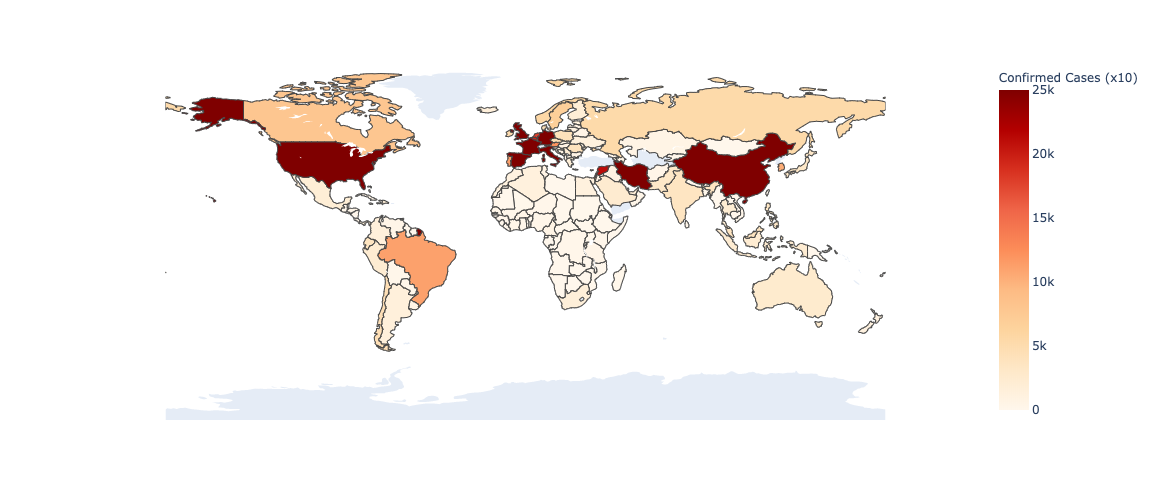

In [54]:
import plotly.express as px
import numpy as np

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"]

endpts = list(np.linspace(1, 12, len(colorscale) - 1))

fig = px.choropleth(grouped_countries, locations='code',
                    hover_data=["CumConfirmed", "CumDeaths"],
                    color='CumConfirmed',
                    range_color=(0, 25000),
                    color_continuous_scale='orrd', 
                    labels={'CumConfirmed': 'Confirmed Cases (x10)', 'CumDeaths': 'Deaths'}, 
                    featureidkey="grouped_countries.CumDeaths",
                    scope='world', height=500, width=1000)
fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        )
    )

fig.show()

In [55]:
np.log10(grouped_countries['CumConfirmed'])

0      2.542825
1      2.557507
2      3.120574
3      2.699838
4      1.146128
         ...   
178    2.382017
179    2.374748
180    0.602060
181    1.591065
182    0.954243
Name: CumConfirmed, Length: 183, dtype: float64

In [56]:
def world_map():
    fig = px.choropleth(grouped_countries, locations='code',
                    color='CumConfirmed',
                    color_continuous_scale='Reds', 
                    labels={'Confirmed Cases': 'CumConfirmed', 'Deaths': 'CumDeaths'}, 
                    featureidkey="grouped_countries.CumDeaths",
                    scope='world')
    fig.update_layout(
            title_text='Global Cases',
            geo=dict(
                showframe=False,
                showcoastlines=False,
                projection_type='equirectangular'
            )
        )

    return fig

In [57]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

tick_font = {
    'size': 12,
    'color': "rgb(30,30,30)",
    'family': "Helvetica, sans-serif"
}

colors = {'background': '#111111', 'text': '#7FDBFF'}


def loadData(fileName, columnName):
    data = pd.read_csv(base_url + fileName) \
             .melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name=columnName) \
             .fillna('<all>')
    data['date'] = data['date'].astype('datetime64[ns]')
    return data


all_data = loadData("time_series_covid19_confirmed_global.csv", "CumConfirmed") \
    .merge(loadData("time_series_covid19_deaths_global.csv", "CumDeaths")) \
    .merge(loadData("time_series_covid19_recovered_global.csv", "CumRecovered"))

all_data['location'] = list(zip(all_data['Lat'], all_data['Long']))

countries = sorted(all_data['Country/Region'].unique())

# Grouping data by country
grouped_country = all_data.groupby('Country/Region').max().reset_index()
grouped_country.drop('Province/State', axis=1, inplace=True)
total_confirmed = grouped_country['CumConfirmed'].sum().astype(str)
total_deaths = grouped_country['CumDeaths'].sum().astype(str)
#print(total_confirmed)
#print(total_deaths)

# Adding 3-letter country codes
input_countries = grouped_country['Country/Region']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

#print(codes)
grouped_country['code'] = codes

# Manually updating some 3-letter codes
grouped_country.loc[20, 'code'] = 'BOL'
grouped_country.loc[24, 'code'] = 'BWN'
grouped_country.loc[27, 'code'] = 'MMR'
grouped_country.loc[37, 'code'] = 'COG'
grouped_country.loc[38, 'code'] = 'COD'
grouped_country.loc[40, 'code'] = 'CIV'
grouped_country.loc[73, 'code'] = 'VAT'
grouped_country.loc[79, 'code'] = 'IRN'
grouped_country.loc[89, 'code'] = 'KOR'
grouped_country.loc[90, 'code'] = 'RKS'
grouped_country.loc[93, 'code'] = 'LAO'
grouped_country.loc[110, 'code'] = 'MDA'
grouped_country.loc[135, 'code'] = 'RUS'
grouped_country.loc[157, 'code'] = 'TWN'
grouped_country.loc[158, 'code'] = 'TZA'
grouped_country.loc[164, 'code'] = 'USA'
grouped_country.loc[171, 'code'] = 'VEN'
grouped_country.loc[172, 'code'] = 'VNM'
grouped_country.loc[173, 'code'] = 'PSE'

grouped_country.head()

,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths,CumRecovered,location,code
0,Afghanistan,33.0000,65.0000,2020-04-05,349,7,15,"(33.0, 65.0)",AFG
1,Albania,41.1533,20.1683,2020-04-05,361,20,104,"(41.1533, 20.1683)",ALB
2,Algeria,28.0339,1.6596,2020-04-05,1320,152,90,"(28.0339, 1.6596)",DZA
3,Andorra,42.5063,1.5218,2020-04-05,501,18,26,"(42.5063, 1.5218)",AND
4,Angola,-11.2027,17.8739,2020-04-05,14,2,2,"(-11.2027, 17.8739)",AGO


In [58]:
grouped_country['DeathRate'] = (grouped_country.CumDeaths/grouped_country.CumConfirmed)*100
grouped_country = grouped_country.sort_values(['DeathRate'], ascending=False).reset_index()
grouped_country.head()

,index,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths,CumRecovered,location,code,DeathRate
0,62,Gambia,13.4432,-15.3101,2020-04-05,4,1,2,"(13.4432, -15.3101)",GMB,25.000000
1,96,Liberia,6.4281,-9.4295,2020-04-05,13,3,3,"(6.4281, -9.4295)",LBR,23.076923
2,101,MS Zaandam,0.0000,0.0000,2020-04-05,9,2,0,"(0.0, 0.0)",Unknown code,22.222222
3,71,Guyana,5.0000,-58.7500,2020-04-05,24,4,0,"(5.0, -58.75)",GUY,16.666667
4,120,Nicaragua,12.8654,-85.2072,2020-04-05,6,1,0,"(12.8654, -85.2072)",NIC,16.666667


In [59]:
greater_one = grouped_country[grouped_country['DeathRate'] > 0]

more_than_100 = greater_one[greater_one.CumConfirmed > 1000]

mean = more_than_100.DeathRate.mean()

In [60]:
more_than_100

,index,Country/Region,Lat,Long,date,CumConfirmed,CumDeaths,CumRecovered,location,code,DeathRate
11,83,Italy,43.0000,12.0000,2020-04-05,128948,15887,21815,"(43.0, 12.0)",ITA,12.320470
14,2,Algeria,28.0339,1.6596,2020-04-05,1320,152,90,"(28.0339, 1.6596)",DZA,11.515152
18,170,United Kingdom,55.3781,-2.3644,2020-04-05,47806,4934,135,"(55.3781, -3.4360000000000004)",GBR,10.320880
21,118,Netherlands,52.1326,5.2913,2020-04-05,17851,1766,250,"(52.1326, 5.2913)",NLD,9.893003
22,153,Spain,40.0000,-4.0000,2020-04-05,131646,12641,38080,"(40.0, -4.0)",ESP,9.602267
23,78,Indonesia,-0.7893,113.9213,2020-04-05,2273,198,164,"(-0.7893, 113.9213)",IDN,8.710955
24,60,France,46.8852,165.6180,2020-04-05,92839,8078,16183,"(46.8852, -56.3159)",FRA,8.701085
26,16,Belgium,50.8333,4.0000,2020-04-05,19691,1447,3751,"(50.8333, 4.0)",BEL,7.348535
27,115,Morocco,31.7917,-7.0926,2020-04-05,1021,70,76,"(31.7917, -7.0926)",MAR,6.856024
30,51,Egypt,26.0000,30.0000,2020-04-05,1173,78,247,"(26.0, 30.0)",EGY,6.649616


In [61]:
# import plotly.express as px
# #df = px.data.gapminder()
# fig = px.scatter_geo(all_data, lat='Lat', lon='Long', color="CumConfirmed", size="CumConfirmed",
#                      animation_frame="date",
#                      projection="natural earth")
# fig.show()

In [62]:
# Grouping by location


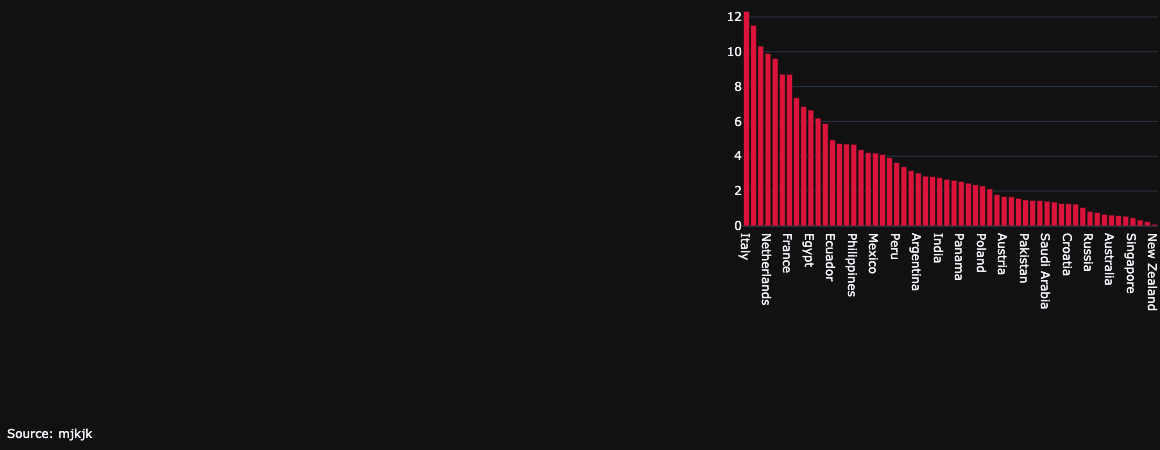

In [79]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# read in volcano database data


# Country
country = grouped_country['Country/Region']


# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.6, 0.4],
    specs=[[{"type": "choropleth", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

# Add scattergeo globe map of volcano locations
# fig.add_trace(
#     go.Choropleth(
#         locations = grouped_country['code'],
#         z = grouped_country['CumConfirmed'],
# #         text = grouped_countries['CumConfirmed'],
#         colorscale = 'Reds',
#         autocolorscale=False,
#         reversescale=False,
#         marker_line_color='darkgray',
#         marker_line_width=0.5,
#         colorbar_tickprefix = '',
#         colorbar_title = '',
#     )
# )
# fig.update_layout(margin={
#         "r": 500,
#         "t": 500,
#         "l": 500,
#         "b": 500
#     }, coloraxis_showscale=False)



#Add locations bar chart
fig.add_trace(
    go.Bar(x=more_than_100["Country/Region"],y=more_than_100["DeathRate"], marker=dict(color="crimson"), showlegend=False),
    row=1, col=2
)

# # Add 3d surface of volcano
# fig.add_trace(
#     go.Surface(z=df_v.values.tolist(), showscale=False),
#     row=2, col=2
# )

# # Update geo subplot properties
# fig.update_geos(
#     projection_type="orthographic",
#     landcolor="white",
#     oceancolor="MidnightBlue",
#     showocean=True,
#     lakecolor="LightBlue"
# )

# # Rotate x-axis labels
# fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(showlegend=False, xaxis={'categoryorder':'total descending'}, coloraxis_showscale=False,
#             coloraxis_colorbar=dict(
#     title="Number of Bills per Cell",
#     thicknessmode="pixels", thickness=10,
#     lenmode="pixels", len=50,
#     yanchor="top", y=1,
#     ticks="outside", ticksuffix=" bills",
#     dtick=5),      
    template="plotly_dark",
    margin=dict(r=0, t=0, b=0, l=0),
    annotations=[
        dict(
text="Source: mjkjk",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

fig.update_layout(coloraxis_showscale=False)

